In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web 
import seaborn as sn 
import datetime as dt

In [2]:
# Import the data of Stock

startdate= dt.datetime(2018,1,1)
enddate= dt.datetime(2021,3,27)

df = web.DataReader("AAPL","yahoo",startdate, enddate)
df= pd.DataFrame(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 814 entries, 2018-01-02 to 2021-03-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       814 non-null    float64
 1   Low        814 non-null    float64
 2   Open       814 non-null    float64
 3   Close      814 non-null    float64
 4   Volume     814 non-null    float64
 5   Adj Close  814 non-null    float64
dtypes: float64(6)
memory usage: 44.5 KB


Text(0, 0.5, 'Price ($)')

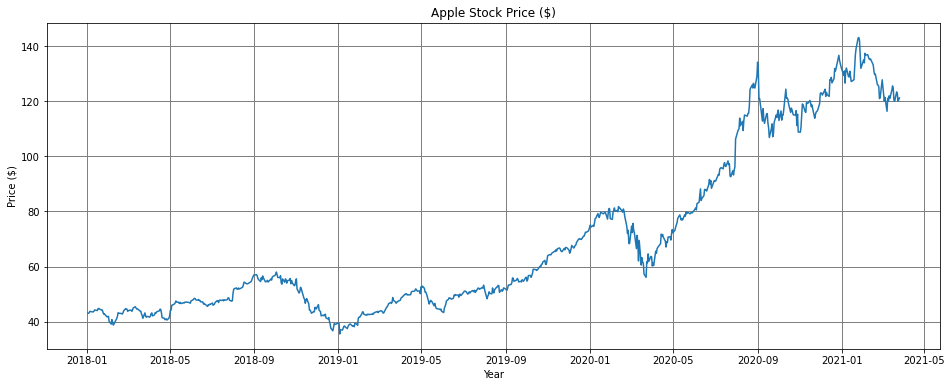

In [55]:
# Plotting the Close prices of Stock

plt.figure(figsize=(16,6))

plt.plot(df['Close'])
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.title('Apple Stock Price ($)')
plt.xlabel('Year')
plt.ylabel('Price ($)')

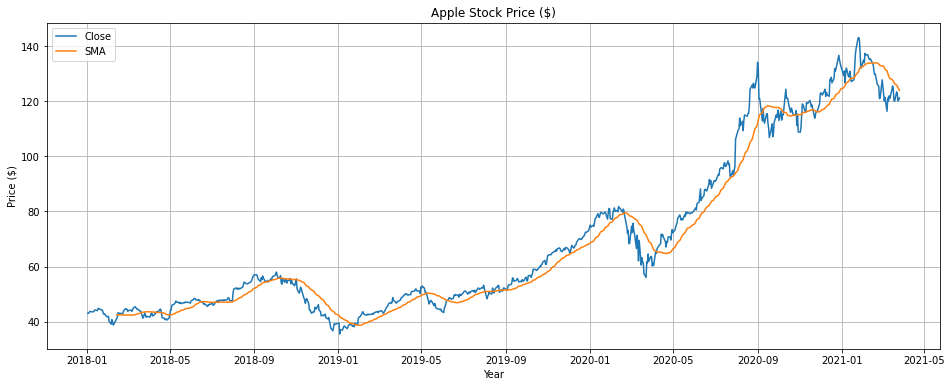

In [4]:
# Comparing the prices with the 30 day rolling close price for TSLA

# Simple Moving Average (SMA)
SMA= df['Close'].rolling(30).mean()

plt.figure(figsize=(16,6))
plt.plot(df['Close'], label='Close')
plt.plot(SMA, label= 'SMA')
plt.title('Apple Stock Price ($)')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend(loc= 'upper left' )
plt.show()

# Technical Analysis




# Exponential Weighted Moving Average (EMA)

Exponential Moving Averages are the average price of stock pver a given period. The unique characteristic of EMA is that it gives more weight to the recent period as compared to previous periods. Thus it gives more importance to recent events and gives a more reliable estimate than Simple Moving Average. Generally, when the stock trades below the  EMA line it is a sell signal, and when it cuts the line from below, it is a buy signal.

Parameters 
- 14 and 30 days EWM is used for short-term trend
           
- 50 and 200 days EWM is used for long-term trend

Text(0.5, 1.0, 'Apple Exponential Moving Averages')

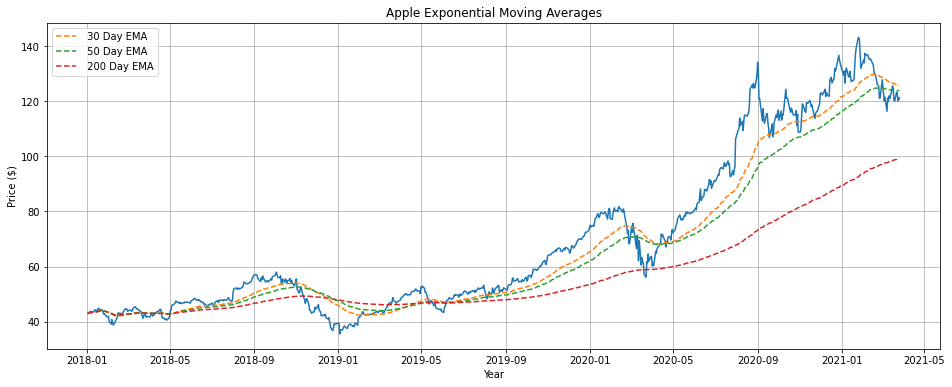

In [5]:
# Calculate the 30 days EWMA

EWMA_30_Day=df['Close'].ewm(30).mean()
EWMA_50_Day=df['Close'].ewm(50).mean()
EWMA_200_Day=df['Close'].ewm(200).mean()

# Compare the 30 days close and EWMA

plt.figure(figsize=(16,6))
plt.plot(df['Close'])
plt.plot(EWMA_30_Day,label=' 30 Day EMA',linestyle='--')
plt.plot(EWMA_50_Day,label=' 50 Day EMA',linestyle='--')
plt.plot(EWMA_200_Day,label=' 200 Day EMA',linestyle='--')
plt.grid(True)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.title('Apple Exponential Moving Averages')


# Bollinger Bands

Bollinger Bands are volatility indicators. They consider the volatility of the stock based on the given period, and provides a range of the possible stock movement. There is one lower and upper band each. They Upper band gives range to which the stock price can rise based on volaitlity and the vice versa for lower band. When the distance between the two bands is narrow, volatility is less, if the gap is broad, it indicates higher volatility. 

Parameters

- Commonly 20 days period and 2 times volatility is used in calculations

- Average Close = 20 Day average of Close price

- Upper Band = 20 Day average of Close price + 2x Volatility of 20 Day

- Lower Band = 20 Day average of Close price - 2x Volatility of 20 Day

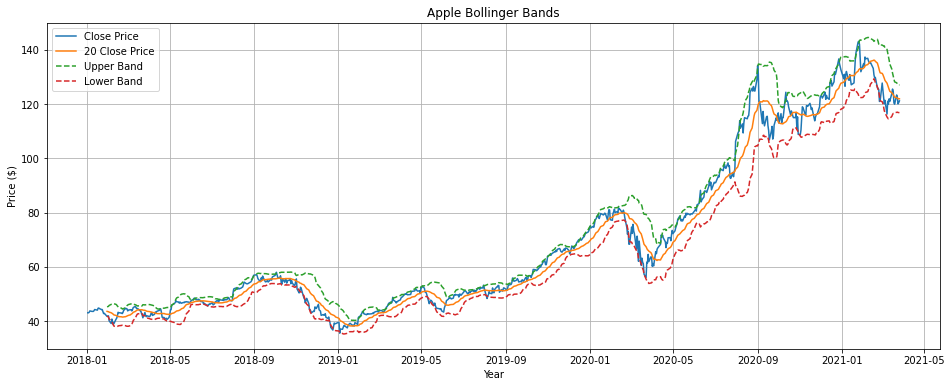

In [6]:
# Creating the bollinger bands for the stock with 20 days moving average


# 20 day moving average (MA) for close price

Close_20_days=df['Close'].rolling(20).mean()


# upper band= 20 days MA + 2x Volatility

upperband=Close_20_days +  2*(df['Close'].rolling(20).std())


# lower band= 20 days MA - 2x Volatility

lowerband=Close_20_days -  2*(df['Close'].rolling(20).std())


# Plot the close price, along with 20 days moving average and the upper and lower bands

plt.figure(figsize=(16,6))
plt.plot(df['Close'], label= "Close Price")
plt.plot(Close_20_days, label= "20 Close Price")
plt.plot(upperband, label= "Upper Band", linestyle='--')
plt.plot(lowerband, label= "Lower Band", linestyle='--')



plt.grid(True)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.title('Apple Bollinger Bands')
plt.show()


# Moving Average Convergence Divergence (MACD)

Moving average convergence divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security's price. The MACD is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA, the resultant is MACD Line. The EMA of 9-period of the MACD Line is calculated for Signal Line. The when MACD Line cuts Signal line from bottom, it is a Buy Indicator, when it cuts the Signal Line from top towards bottom, it is a Sell Indicator

Parameters

- MACD Line - 12 Day EMA - 26 Day EMA

- Signal Line - 9 Day EMA MACD 

Text(0.5, 1.0, 'Apple MACD')

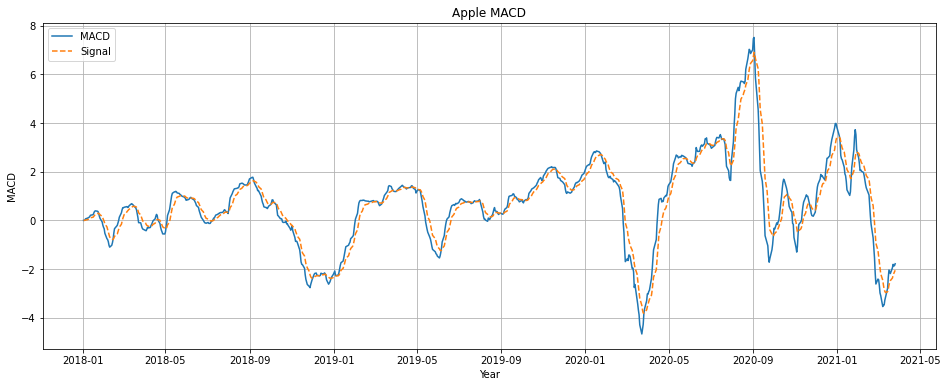

In [7]:
# Calculate the Moving average convergence divergence (MACD)

# Calculate the EWMA, 26 Day and 12 Day

EWMA1 =df['Close'].ewm(span=12, adjust=False).mean()
EWMA2 =df['Close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD

df['MACD']= EWMA1- EWMA2

# Calculate the Signal Line

df['Signal']= df['MACD'].ewm(span=9, adjust=False).mean()



# Plot the MACD and Signal Line

plt.figure(figsize=(16,6))
plt.plot(df['MACD'], label='MACD')
plt.plot(df['Signal'], label='Signal', linestyle='--')
plt.xlabel('Year')
plt.ylabel('MACD')

plt.grid(True)
plt.legend(loc='upper left')
plt.title('Apple MACD')

Text(0.5, 1.0, 'Apple Buy and Sell Signals')

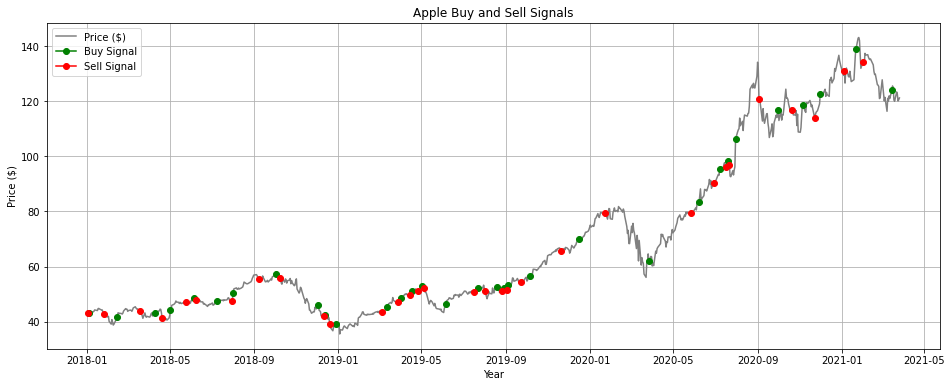

In [8]:
# Buy and Sell Signal

def buy_sell_macd(signal):
    buy=[]
    sell=[]
    flag=-1
    
    for i in range(0,len(signal)):
        if signal['MACD'][i]> signal['Signal'][i]:
            sell.append(np.nan)
            if flag != 1:
                buy.append(signal['Close'][i])
                flag = 1
            else: 
                buy.append(np.nan)
        elif signal['MACD'][i]< signal['Signal'][i]:
            buy.append(np.nan) 
            if flag != 0:
                sell.append(signal['Close'][i])
                flag = 0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return (buy,sell)

# Buy and Sell columns

x= buy_sell_macd(df)

df['Buy MACD']= x[0]
df['Sell MACD']= x[1]

# Plot the buy and sell signals

plt.figure(figsize=(16,6))
plt.plot(df['Close'],label='Price ($)', color='grey')
plt.plot(df['Buy MACD'], label='Buy Signal',color='g', marker='o', alpha=1)
plt.plot(df['Sell MACD'], label='Sell Signal',color='r', marker='o')

plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.title('Apple Buy and Sell Signals')

# Average True Range (ATR)

The average true range (ATR) is a market volatility indicator used in technical analysis. It is typically derived from the 14-day simple moving average of a series of true range indicators. 

Parameters

- High-Low = High Price - Low Price

- High-Close = High Price - Previous Close

- Low-Close = Low Price - Previous Close

- True Range = Max['High-Low',abs['High-Close'],abs['Low-Close']

- ATR = Average of True Range

Text(0.5, 1.0, 'Apple')

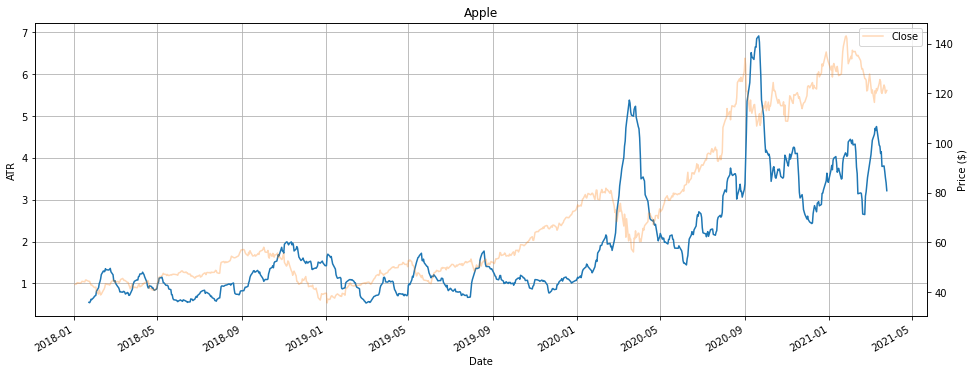

In [50]:
# Create the ATR

# Calculate the High- Low Price
high_low = df['High']- df['Low']

# Calculate the High- Previous Close
high_cp = np.abs(df['High'] - df['Close'].shift())

#  Calculate the Low- Previous Close
low_cp = np.abs(df['Low']- df['Close'].shift())

# Combine the values
data= pd.concat([high_low,high_cp,low_cp],axis=1)

# Calculate the ATR
df['true_range'] = np.max(data, axis= 1)
df['ATR'] = df['true_range'].rolling(14).mean()


# Plot the ATR with the Close price

fig,ax = plt.subplots(figsize=(16,6))

df['ATR'].plot(ax=ax, label='ATR')
ax2 = df['Close'].plot(ax=ax, secondary_y=True, alpha=0.3)
ax.set_ylabel('ATR')
ax2.set_ylabel('Price ($)')
ax.grid(True)
plt.legend()
plt.title('Apple')

# Relative Strength Index (RSI)

The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. The RSI is displayed as an oscillator (a line graph that moves between two extremes) and can have a reading from 0 to 100. Generally, above 70 is overbought zone, whereas below 30 is oversold zone.

Parameters

- Average Gains = Average Gains in 14 Day

- Average Loss = Average Loss in 14 Day

- Relative Strength = Average Gains/Average Loss

- Relative Strength Index = 100 - (100/(1+RS))

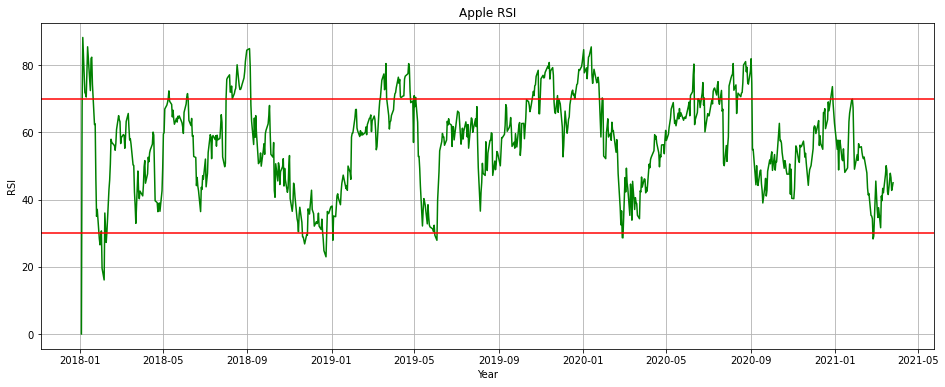

In [9]:
# Calculate the RSI

# Calculate the difference in price over the previous day
# Today- Yesterday

Delta=df['Close'].diff()

# If lower then 0, then value 0

df['Up']=Delta.clip(lower=0)

# If above 0, then value 0

df['Down']=-1*Delta.clip(upper=0)

# Calculate the average gain or loss over the 13 day period

U= df['Up'].ewm(13, adjust=False).mean()
D= df['Down'].ewm(13, adjust=False).mean()

# Calculate Relative Strength

rs= U/D

# Calculate the Relative Strength Index

df['RSI']= (100-(100/(1+rs)))

# Plot the Relative Strength INdex with the Overbought and Oversold limits

plt.figure(figsize=(16,6))
plt.plot(df['RSI'],color='g')
plt.xlabel('Year')
plt.title('Apple RSI')
plt.ylabel('RSI')
plt.axhline(30, color='r', linestyle='-')
plt.axhline(70, color='r', linestyle='-')
plt.grid(True)
plt.show()

# Stochastic Oscillator

A stochastic oscillator is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. The sensitivity of the oscillator to market movements is reducible by adjusting that time period or by taking a moving average of the result. It is used to generate overbought and oversold trading signals, utilizing a 0–100 bounded range of values.

Parameters

- Close-Low = 14 Day Close-Low

- High-Low = 14 Day High-Low

- Fast Stochastic = (Close-Low)/(High-Low) * 100

- Slow Stochastic = 3 Day Moving Average of Fast Stochastic

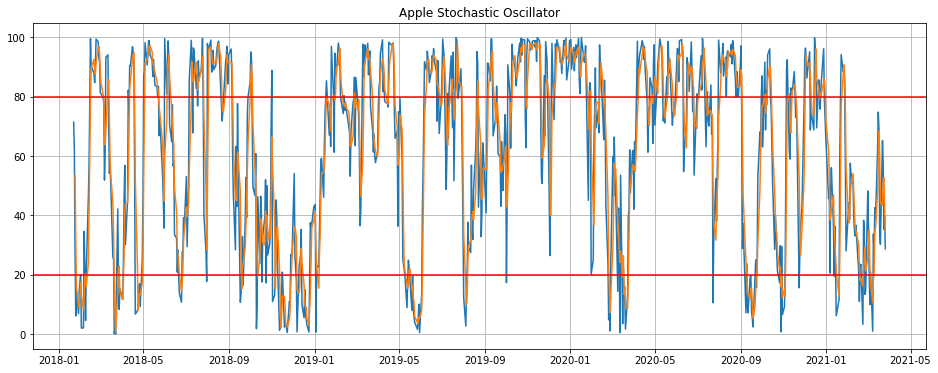

In [11]:
# Create Stochastic Oscillator

# Calculate the rolling Low and High Prices

df['L14']= df['Low'].rolling(14).min()
df['H14']= df['High'].rolling(14).max()

# Calculate the Fast Stochastic Oscillator

df['k'] = 100 * ((df['Close']-df['L14'])/(df['H14'] - df['L14']))

# Calculate the Slow Stochastic Oscillator

df['d'] = df['k'].rolling(3).mean()


plt.figure(figsize=(16,6))
plt.plot(df['k'])
plt.plot(df['d'])
plt.title('Apple Stochastic Oscillator')
plt.axhline(20, color='r', linestyle='-')
plt.axhline(80, color='r', linestyle='-')
plt.grid(True)
plt.show()
plt.show()

# On Balance Volume (OBV)

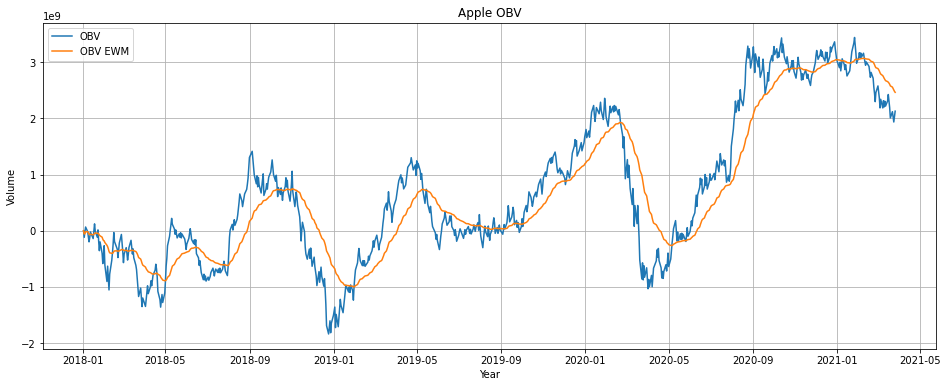

In [13]:
# Calculate the Positive and Negative Prices

OBV =[]
OBV.append(0)
for i in range(1,len(df.Close)):
  if df.Close[i] > df.Close[i-1]:
    OBV.append(OBV[-1] + df.Volume[i])
  elif df.Close[i] < df.Close[i-1]:
    OBV.append(OBV[-1] - df.Volume[i])
  else:
    OBV.append(OBV[-1])
  

# Create a Column for OBV

df['OBV']=OBV
df['OBV EWM']= df['OBV'].ewm(20).mean()

# Plot the OBV and OBV EWM

plt.figure(figsize=(16,6))
plt.title('Apple OBV')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.plot(df['OBV'], label= 'OBV')
plt.plot(df['OBV EWM'], label= 'OBV EWM')
plt.legend()
plt.grid(True)
plt.show()

# Stock Price

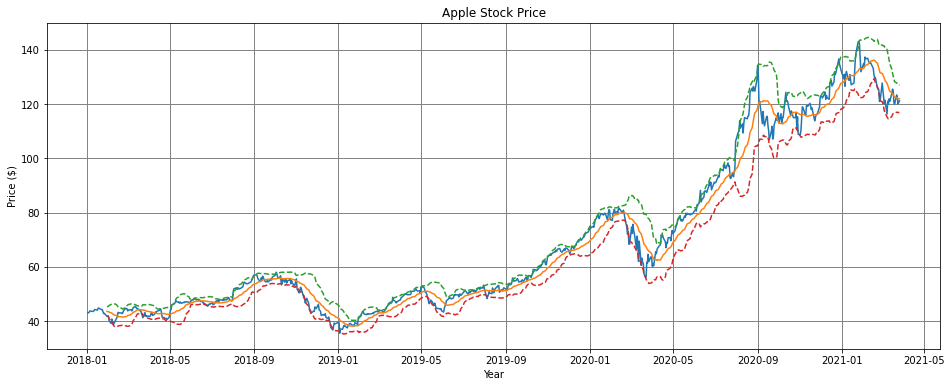

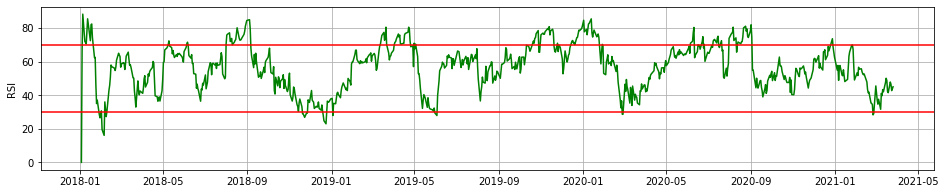

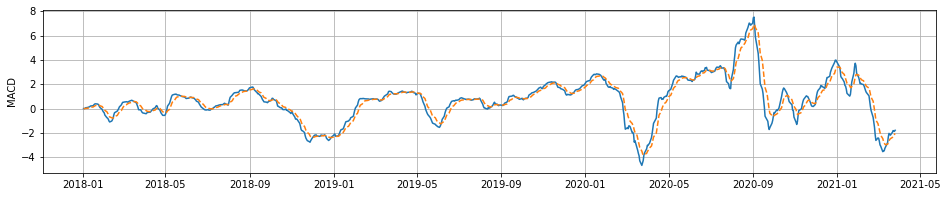

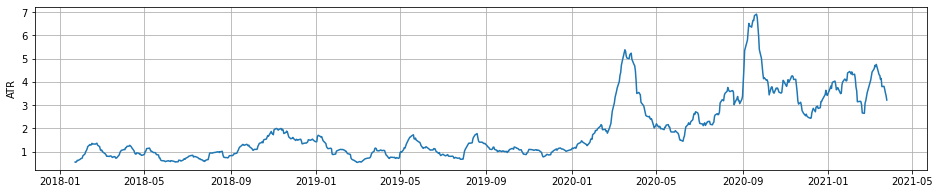

In [52]:
# Plot the price of Apple, along with the Bollinger Bands, RSI, and MACD

plt.figure(figsize=(16,6))

plt.plot(df['Close'], label= "Close Price")
plt.plot(Close_20_days, label= "20 Close Price")
plt.plot(upperband, label= "Upper Band", linestyle='--')
plt.plot(lowerband, label= "Lower Band", linestyle='--')
plt.grid(color='grey', linestyle='-', linewidth=1, alpha=10)
plt.title('Apple Stock Price')
plt.xlabel('Year')
plt.ylabel('Price ($)')



plt.figure(figsize=(16,3))
plt.plot(df['RSI'],color='g')
plt.ylabel('RSI')
plt.axhline(30, color='r', linestyle='-')
plt.axhline(70, color='r', linestyle='-')
plt.grid(True)
plt.show()

plt.figure(figsize=(16,3))
plt.plot(df['MACD'], label='MACD')
plt.plot(df['Signal'], label='Signal', linestyle='--')
plt.ylabel('MACD')
plt.grid(True)

plt.figure(figsize=(16,3))
plt.plot(df['ATR'], label='ATR')
plt.ylabel('ATR')
plt.grid(True)
plt.show()